# Análise de dados dos datasets Portugal 2020 - Dados.gov.pt

## Nota prévia
Este notebook descarrega o dataset no endereço `url` e converte o ficheiro XLSX resultante em CSV para uma melhor performance.  
Para não descarregar o ficheiro pode alterar a variável `download` para `False`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from IPython.display import display, HTML, Markdown
import urllib.request

## INTERRUPTOR PARA DOWNLOAD (mudar para False se já tiver o dataset descarregado)
download = False

# Atualizar o URL se necessário
# Não consigo perceber se isto é um permalink para uma a última versão do dataset, ou para esta versão em específico.
url = 'https://dados.gov.pt/pt/datasets/r/be5ca8e2-4db2-4bf2-9485-10dbb15ebbf3'

# Guardar os ficheiros (XLSX, CSV) com este nome
filename = "operacoes"

# Descarregar e converter o ficheiro XLSX para CSV.
if (download):
    urllib.request.urlretrieve(url, filename+'.xlsx')
    wb=pd.read_excel(filename+".xlsx", sheet_name=0)
    wb.to_csv(filename+".csv", index=False)

# Floats com 2 casas decimais. Efeito secundário é a remoção da notação científica.
pd.options.display.float_format = '{:.2f}'.format

# Ler o ficheiro CSV
df = pd.read_csv(filename+".csv")

# Ignorar estas colunas
# As últimas 3 colunas do ficheiro não têm nome nem dados, são removidas também.
df = df.drop(['Multi Concelho', 'Código do Concelho Dominante da Operação','Designação Concelho Dominante',
              'Código do Domínio Temático da Operação','Código do Programa Operacional da Operação',
              'Código do Fundo da Operação','Código Natureza do Investimento da Operação',
              'Código do Estado da Operação', 'Código da Operação',
              'Código da NUTS III Dominante da Operação','Designação NUTS III Dominante',
              'Multi NUTS III', 'Multi NUTS II',
              'Código da NUTS II Dominante da Operação','Designação NUTS II Dominante',
              'Unnamed: 31','Unnamed: 32','Unnamed: 33'], axis=1)

### Somatório "Apoio Total Aprovado", agrupado por "Designação do Programa Operacional da Operação"

In [2]:
designacao_programa = df.groupby(['Designação do Programa Operacional da Operação'])['Apoio Total Aprovado - Em Vigor'].sum().sort_values(0,ascending=False)
designacao_programa.reset_index()


,Designação do Programa Operacional da Operação,Apoio Total Aprovado - Em Vigor
0,Programa Operacional da Competitividade e Inte...,5929997884.59
1,Programa Operacional do Capital Humano,3281199139.31
2,Programa Operacional Regional do Norte,3004449221.50
3,Programa Operacional da Inclusão Social e Emprego,2388816039.55
4,Programa Operacional da Sustentabilidade e Efi...,2146470601.66
5,Programa Operacional Regional do Centro,1914952797.66
6,Programa Operacional Regional do Alentejo,1161666017.56
7,Programa Operacional Regional dos Açores,1091486386.71
8,Programa Operacional Regional de Lisboa,867669502.84
9,Programa Operacional Regional da Madeira,391909986.60


#### Gráfico

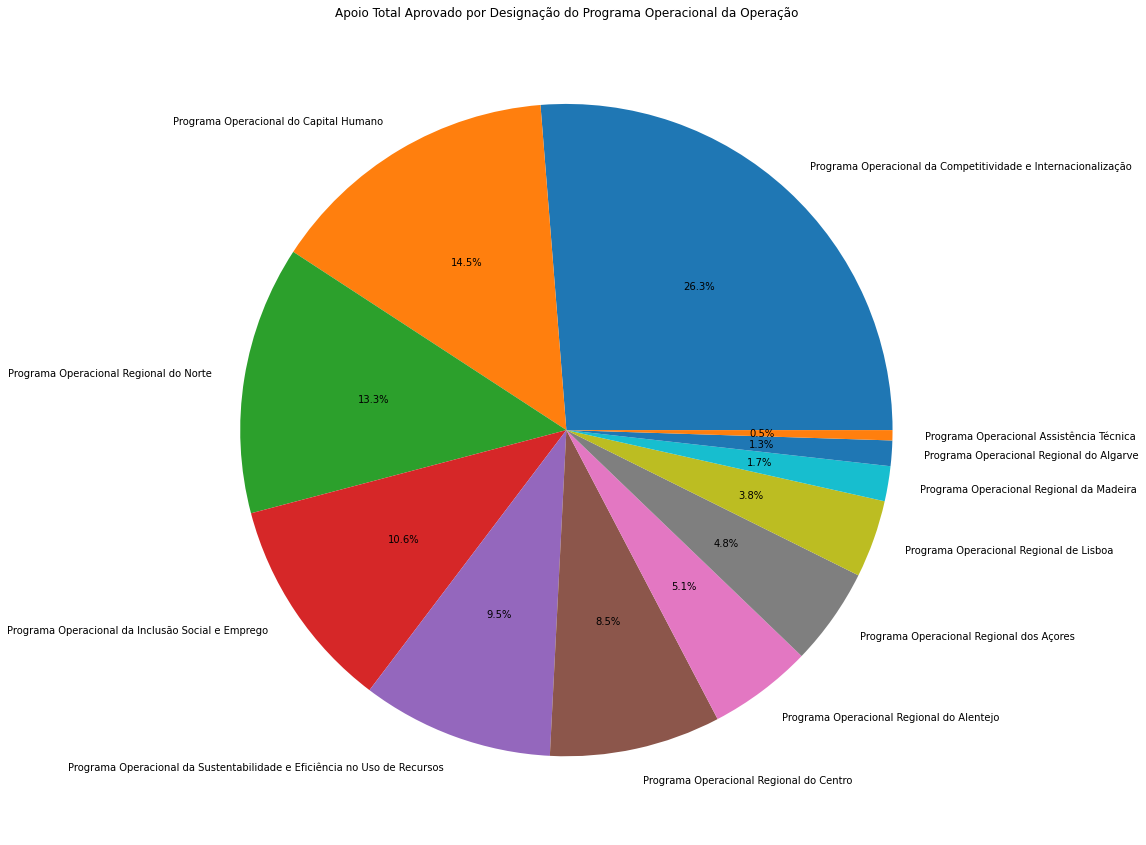

In [3]:
plot_designacao = designacao_programa.plot.pie(ylabel='', figsize=(15, 15), title='Apoio Total Aprovado por Designação do Programa Operacional da Operação', legend=False, autopct='%1.1f%%')

In [4]:
total_apa = df['Apoio Total Aprovado - Em Vigor'].sum()
display(Markdown('### Somatório do Apoio Total Aprovado - Em Vigor: ' + str(total_apa.round(2))))

### Somatório do Apoio Total Aprovado - Em Vigor: 22577478617.19

### % Apoio Total Aprovado, por Área Temática

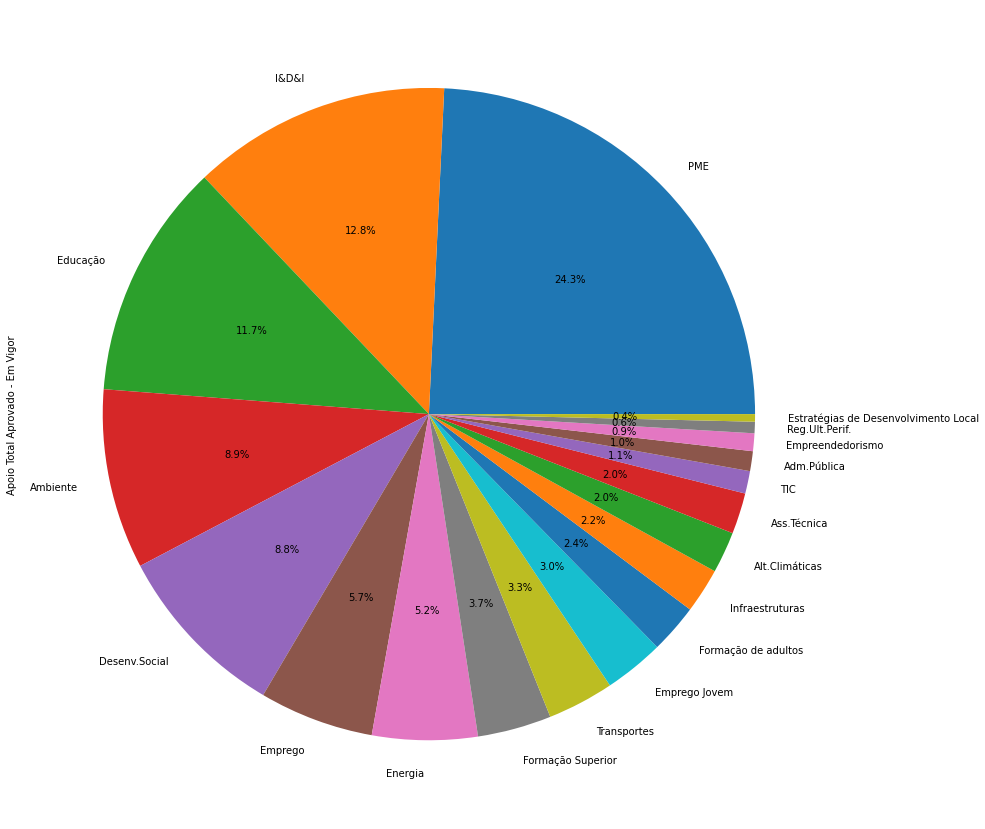

In [5]:
area_tematica = df.groupby(['Área Temática'])['Apoio Total Aprovado - Em Vigor'].sum().sort_values(0,ascending=False)
plot = area_tematica.plot.pie(y='Valor', figsize=(15, 15), autopct='%1.1f%%')

### Apoio Total Aprovado em Euros, agrupado por Área Temática (Euros)

In [6]:
area_tematica.reset_index()

,Área Temática,Apoio Total Aprovado - Em Vigor
0,PME,5475327997.11
1,I&D&I,2897119728.68
2,Educação,2641783111.40
3,Ambiente,2014027820.89
4,Desenv.Social,1989583300.06
5,Emprego,1281707704.56
6,Energia,1177754664.10
7,Formação Superior,826171263.83
8,Transportes,744326700.46
9,Emprego Jovem,670907519.31


In [7]:
df.groupby(['NIF Beneficiário Principal da Operação','Beneficiário Principal da Operação'])['Apoio Total Aprovado - Em Vigor'].sum().sort_values(0,ascending=False)[:50].reset_index()

,NIF Beneficiário Principal da Operação,Beneficiário Principal da Operação,Apoio Total Aprovado - Em Vigor
0,501442600,"INSTITUTO DO EMPREGO E FORMAÇÃO PROFISSIONAL, ...",1448991170.65
1,600061388,DIRECÇÃO-GERAL DO ENSINO SUPERIOR,610352449.04
2,503933813,"INFRAESTRUTURAS DE PORTUGAL, S.A.",599027055.44
3,503904040,FUNDAÇÃO PARA A CIÊNCIA E A TECNOLOGIA,425002001.75
4,513230068,IFD - INSTITUIÇÃO FINANCEIRA DE DESENVOLVIMENT...,374855057.00
5,672000431,FUNDO REGIONAL DO EMPREGO,194069441.03
6,671001329,SECRETARIA REGIONAL DE EQUIPAMENTOS E INFRAEST...,182392672.49
7,600015467,SECRETARIA-GERAL DA EDUCAÇÃO E CIÊNCIA,179959438.13
8,503278602,METRO DO PORTO S.A.,137000000.00
9,600086739,ESTRUTURA DE GESTÃO DO IFRRU 2020 INSTRUMENTO ...,116125850.00


### NIF dos 100 maiores beneficiários privados

In [8]:
beneficiarios_privados = df.loc[df['Beneficiário Principal da Operação'] == 'Privado']
beneficiarios_privados.groupby(['NIF Beneficiário Principal da Operação','Beneficiário Principal da Operação'])['Apoio Total Aprovado - Em Vigor'].sum().sort_values(0,ascending=False)[:50].reset_index()

,NIF Beneficiário Principal da Operação,Beneficiário Principal da Operação,Apoio Total Aprovado - Em Vigor
0,174915284,Privado,5511755.96
1,227996399,Privado,3677136.21
2,224851322,Privado,2964837.31
3,270445439,Privado,1799999.99
4,186858353,Privado,1400624.38
5,143834290,Privado,790730.58
6,207527938,Privado,591616.07
7,182770320,Privado,463425.10
8,153055324,Privado,437786.21
9,109785622,Privado,367686.20


### Candidaturas com "machine learning" ou "inteligência artificial" na descrição

In [9]:
df[df['Resumo da Operação'].str.contains("(?i)machine learning|inteligência artificial", na=False)]

,Data,Designação da Operação,Resumo da Operação,Designação do Programa Operacional da Operação,Sigla do Fundo da Operação,Designação do Fundo da Operação,Designação Domínio Temático da Operação,Área Temática,Estado da Operação,Natureza do Investimento da Operação,NIF Beneficiário Principal da Operação,Beneficiário Principal da Operação,Apoio Total Aprovado - Em Vigor,Apoio Executado,Data Prevista Conclusão,Data Efetiva Conclusão da Operação
33,2020-12-31,SEA-THINGS:Objetos de Aprendizagem para Promov...,O projeto SEA-Things visa promover a literacia...,Programa Operacional Regional dos Açores,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,I&D&I,Em Execução,Acções imateriais / Estudos,512058407,"FUNDAÇÃO GASPAR FRUTUOSO, FP",159372.09,17052.99,2021-12-31,1899-12-30 00:00:00
2670,2020-12-31,Internacionalização da marca Sirius Robots,O presente projeto refere-se à estratégia e ob...,Programa Operacional Regional do Algarve,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,PME,Em Execução,Acções imateriais / Estudos,508989736,"SEARCHPROF, LDA",199863.00,0.00,2021-08-31,1899-12-30 00:00:00
2692,2020-12-31,NEWS MARKETS,A FAVORITWIZARD pretende promover-se no mercad...,Programa Operacional Regional do Algarve,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,PME,Aceite pelas Entidades / Contratada,Acções imateriais / Estudos,513500430,FAVORITWIZARD LDA,59536.13,0.00,2022-12-31,1899-12-30 00:00:00
3213,2020-12-31,AAC no âmbito do SI2E - AG CRESC ALGARVE2020,"Alavancar o mercado das TIC, com o Turismo enq...",Programa Operacional Regional do Algarve,FSE,Fundo Social Europeu,Inclusão Social e Emprego,Empreendedorismo,Aceite pelas Entidades / Contratada,,514916990,"YOURDATA ANALYTICS, LDA",15440.40,0.00,2021-11-30,1899-12-30 00:00:00
3285,2020-12-31,Aplicação de Inteligência Artificial em Fluxos...,"Alavancar o mercado das TIC, com o Turismo enq...",Programa Operacional Regional do Algarve,FEDER,Fundo Europeu de Desenvolvimento Regional,Inclusão Social e Emprego,Empreendedorismo,Em Execução,Produtivo,514916990,"YOURDATA ANALYTICS, LDA",16505.84,731.30,2021-10-08,1899-12-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49327,2020-12-31,Capacitação e modernização das administrações ...,Potenciar a gestão do conhecimento gerado a pa...,Programa Operacional da Competitividade e Inte...,FSE,Fundo Social Europeu,Competitividade e Internacionalização,Adm.Pública,Aceite pelas Entidades / Contratada,,600056120,GABINETE NACIONAL DE SEGURANÇA (GNS),167433.00,0.00,2021-09-30,0
49328,2020-12-31,Capacitação e modernização das administrações ...,A execução da operação CliKODE permitirá autom...,Programa Operacional da Competitividade e Inte...,FSE,Fundo Social Europeu,Competitividade e Internacionalização,Adm.Pública,Em Execução,,509821197,"CENTRO HOSPITALAR UNIVERSITÁRIO DE SÃO JOÃO, E...",253213.05,0.00,2020-12-31,2020-03-25 00:00:00
49330,2020-12-31,Capacitação e modernização das administrações ...,IVDP DATA+ - A utopia da previsão na Artificia...,Programa Operacional da Competitividade e Inte...,FSE,Fundo Social Europeu,Competitividade e Internacionalização,Adm.Pública,Aceite pelas Entidades / Contratada,,501176080,"INSTITUTO DOS VINHOS DO DOURO E DO PORTO, I.P.",244772.46,0.00,2021-12-30,0
49333,2020-12-31,Capacitação e modernização das administrações ...,Audit + : motor de inteligência artificial e s...,Programa Operacional da Competitividade e Inte...,FSE,Fundo Social Europeu,Competitividade e Internacionalização,Adm.Pública,Em Execução,,510123210,"CENTRO HOSPITALAR DO BAIXO VOUGA, E.P.E. (CHBV...",254830.00,0.00,2021-12-31,2020-07-06 00:00:00


## Candidaturas sobre 'COVID-19'

In [10]:
df[df['Resumo da Operação'].str.contains("(?i)covid|covid-19", na=False)]

,Data,Designação da Operação,Resumo da Operação,Designação do Programa Operacional da Operação,Sigla do Fundo da Operação,Designação do Fundo da Operação,Designação Domínio Temático da Operação,Área Temática,Estado da Operação,Natureza do Investimento da Operação,NIF Beneficiário Principal da Operação,Beneficiário Principal da Operação,Apoio Total Aprovado - Em Vigor,Apoio Executado,Data Prevista Conclusão,Data Efetiva Conclusão da Operação
652,2020-12-31,Adaptação da Clínica Médico-Dentária ao contex...,Readaptação da clínica ao COVID-19,Programa Operacional Regional dos Açores,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,PME,Aprovada,Produtivo,509294073,"LUÍS ARRUDA, CLÍNICA DENTÁRIA, LDA",4249.70,0.00,2020-07-01,1899-12-30 00:00:00
653,2020-12-31,Adaptação do estabelecimento ao contexto da CO...,CONCURSO PARA APRESENTAÇÃO DE CANDIDATURAS - P...,Programa Operacional Regional dos Açores,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,PME,Em Execução,Produtivo,512014132,"MICRO-HORTA,COMERCIO E INFORMATICA LDA",1560.67,1500.46,2021-01-15,1899-12-30 00:00:00
654,2020-12-31,EPI´s e Adaptação (COVID-19),EPI´s e Adaptação (COVID-19),Programa Operacional Regional dos Açores,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,PME,Aprovada,Produtivo,512075190,F. CODERNIZ & FILHOS LDA,788.67,0.00,2020-11-14,1899-12-30 00:00:00
655,2020-12-31,COVID-19: ArcoDente Readaptação à nova realidade,COVID-19: ArcoDente Readaptação à nova realidade,Programa Operacional Regional dos Açores,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,PME,Em Execução,Produtivo,512038791,"ARCODENTE - LABORATÓRIO DE PRÓTESE DENTÁRIA , LDA",4109.92,4109.92,2020-12-18,1899-12-30 00:00:00
656,2020-12-31,Adaptação do restaurante Forneria São Dinis ao...,Forneria Segura no Covid,Programa Operacional Regional dos Açores,FEDER,Fundo Europeu de Desenvolvimento Regional,Competitividade e Internacionalização,PME,Aceite pelas Entidades / Contratada,Produtivo,510642330,"FORNERIA SÃO DINIS - RESTAURAÇÃO, LDA",3674.91,0.00,2021-01-15,1899-12-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83194,2020-12-31,Formação de ativos para a empregabilidade - Fo...,"A operação visa o reforço das qualificações, d...",Programa Operacional da Inclusão Social e Emprego,FSE,Fundo Social Europeu,Inclusão Social e Emprego,Emprego,Aceite pelas Entidades / Contratada,,508322669,"PENHAS - CONSULTORIA E EVENTOS, LDA.",110078.43,0.00,2022-12-30,0
83214,2020-12-31,Formação de ativos para a empregabilidade - Fo...,A operação potência a empregabilidade da popul...,Programa Operacional da Inclusão Social e Emprego,FSE,Fundo Social Europeu,Inclusão Social e Emprego,Emprego,Aceite pelas Entidades / Contratada,,501136401,"ASSOCIAÇÃO COMERCIAL, INDUSTRIAL E SERVIÇOS DE...",407105.94,0.00,2022-12-30,0
83249,2020-12-31,Formação de ativos para a empregabilidade - Fo...,Esta operação visa dotar a população ativa (at...,Programa Operacional da Inclusão Social e Emprego,FSE,Fundo Social Europeu,Inclusão Social e Emprego,Emprego,Aceite pelas Entidades / Contratada,,507673638,WEB4U UNIPESSOAL LDA,138672.19,0.00,2022-11-15,0
83251,2020-12-31,Formação de ativos para a empregabilidade - Fo...,Apoia a recuperação económica através da manut...,Programa Operacional da Inclusão Social e Emprego,FSE,Fundo Social Europeu,Inclusão Social e Emprego,Emprego,Aprovada,,500849587,ASSOCIAÇÃO DOS COMERCIANTES DO PORTO,403461.00,0.00,2022-12-30,0


In [11]:
total_executado = df['Apoio Executado'].sum()

In [12]:
display(Markdown('### Informações gerais dos Apoios'))
display(Markdown('Total de Apoio Total Aprovado - Em Vigor: ' + str(total_apa.round(2))))
display(Markdown('Total de Apoio Executado: ' + str(total_executado.round(2))))
display(Markdown('% de Apoio executado: ' + str((total_executado/total_apa).round(3)*100)  ))

### Informações gerais dos Apoios

Total de Apoio Total Aprovado - Em Vigor: 22577478617.19

Total de Apoio Executado: 11397687126.34

% de Apoio executado: 50.5

In [40]:
df_apoios = df[["Apoio Total Aprovado - Em Vigor", "Apoio Executado"]]["Apoio Total Aprovado - Em Vigor"]
df_com_apoios_executados = df[df['Apoio Executado']!=0]["Apoio Executado"]

display(Markdown('#### Descrição dos Apoios Aprovados'))
display(df_apoios.describe())

display(Markdown('#### Descrição dos Apoios Executados'))
display(df_com_apoios_executados.describe())

#### Descrição dos Apoios Aprovados

count       88354.00
mean       255534.31
std       1598843.91
min             0.01
25%          7500.00
50%         20251.49
75%        144713.36
max     118738326.73
Name: Apoio Total Aprovado - Em Vigor, dtype: float64

#### Descrição dos Apoios Executados

count      35416.00
mean      321823.11
std      1614950.84
min            0.50
25%        15000.00
50%        57410.15
75%       195569.86
max     77428469.55
Name: Apoio Executado, dtype: float64